In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [166]:
df = pd.read_excel('testing.xlsx')

In [167]:
df.head()

,Bank,Year,Deposits,Loans and advances,Investments,NPA,NPL %,Profit
0,Prime Bank,2013,201907.0,153589.0,56940.0,-48317.961281,5.09,1829.0
1,AB Bank,2013,161846.0,28676.0,28676.0,-133169.994029,3.37,1011.0
2,Dhaka Bank,2013,115981.0,99596.0,18757.0,-16384.964363,4.15,1927.0
3,DBBL,2013,145230.1,106422.8,17441.9,-38807.271421,3.90,2000.8
4,City Bank,2013,107497.0,89879.0,26492.0,-17617.932275,8.10,911.0


In [168]:
df["Bank"].unique()

array(['Prime Bank', 'AB Bank', 'Dhaka Bank', 'DBBL', 'City Bank', 'MTB',
       'IFIC', 'EBL', 'One Bank', 'South East Bank'], dtype=object)

In [169]:
df1=df[["Bank", "Year"]]
df1=df1[(df1.Year != 2013)]
df1.reset_index(inplace=True)
df1=df1.drop(columns=["index"])

In [170]:
np_df=np.empty([len(df["Bank"].unique())*(len(df["Year"].unique())-1), df.shape[1]-1], dtype=object) 
np_df1=df1.to_numpy()

In [171]:
df2013=df[(df.Year == 2013)]
df2014=df[(df.Year == 2014)]
df2015=df[(df.Year == 2015)]
df2016=df[(df.Year == 2016)]
df2017=df[(df.Year == 2017)]
df2018=df[(df.Year == 2018)]

np_df2013=df2013.to_numpy()
np_df2014=df2014.to_numpy()
np_df2015=df2015.to_numpy()
np_df2016=df2016.to_numpy()
np_df2017=df2017.to_numpy()
np_df2018=df2018.to_numpy()

In [172]:
"""
def change(x, y):
    if(x != 0):
        i=((y-x)*100.0)/x
        if(i>15.0):
            return 1
        elif(i<=15.0 and i>7.5):
            return 2
        elif(i<=7.5 and i>-7.5):
            return 3
        elif(i<=-7.5 and i>-15):
            return 4
        elif(i<-15.0):
            return 5
    else:
        return 3
"""    
def change(x, y):
    if(x != 0):
        i=((y-x)*100.0)/x
        if(i>10.0):
            return 1
        elif(i<=10.0 and i>-10.0):
            return 2
        elif(i<=-10.0):
            return 3
    else:
        return 2


In [173]:
#2014
for i in range(0, len(df["Bank"].unique())):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(np_df2013[i, 2], np_df2014[i, 2])
    np_df[i, 2] = change(np_df2013[i, 3], np_df2014[i, 3])
    np_df[i, 3] = change(np_df2013[i, 4], np_df2014[i, 4])
    np_df[i, 4] = change(np_df2013[i, 5], np_df2014[i, 5])
    np_df[i, 5] = change(np_df2013[i, 6], np_df2014[i, 6])
    np_df[i, 6] = change(np_df2013[i, 7], np_df2014[i, 7])
 

    
#2015
c=0
for i in range(i+1, len(df["Bank"].unique())+i+1):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(mean([np_df2013[c, 2], np_df2014[c, 2]]) , mean([np_df2014[c, 2], np_df2015[c, 2]]))
    np_df[i, 2] = change(mean([np_df2013[c, 3], np_df2014[c, 3]]) , mean([np_df2014[c, 3], np_df2015[c, 3]]))
    np_df[i, 3] = change(mean([np_df2013[c, 4], np_df2014[c, 4]]) , mean([np_df2014[c, 4], np_df2015[c, 4]]))
    np_df[i, 4] = change(mean([np_df2013[c, 5], np_df2014[c, 5]]) , mean([np_df2014[c, 5], np_df2015[c, 5]]))
    np_df[i, 5] = change(mean([np_df2013[c, 6], np_df2014[c, 6]]) , mean([np_df2014[c, 6], np_df2015[c, 6]]))
    np_df[i, 6] = change(mean([np_df2013[c, 7], np_df2014[c, 7]]) , mean([np_df2014[c, 7], np_df2015[c, 7]]))
    c=c+1
    
    
    
#2016
c=0
for i in range(i+1, len(df["Bank"].unique())+i+1):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(mean([np_df2013[c, 2], np_df2014[c, 2], np_df2015[c, 2]]), 
                         mean([np_df2014[c, 2], np_df2015[c, 2], np_df2016[c, 2]]))
    np_df[i, 2] = change(mean([np_df2013[c, 3], np_df2014[c, 3], np_df2015[c, 3]]),
                         mean([np_df2014[c, 3], np_df2015[c, 3], np_df2016[c, 3]]))
    np_df[i, 3] = change(mean([np_df2013[c, 4], np_df2014[c, 4], np_df2015[c, 4]]), 
                         mean([np_df2014[c, 4], np_df2015[c, 4], np_df2016[c, 4]]))
    np_df[i, 4] = change(mean([np_df2013[c, 5], np_df2014[c, 5], np_df2015[c, 5]]), 
                         mean([np_df2014[c, 5], np_df2015[c, 5], np_df2016[c, 5]]))
    np_df[i, 5] = change(mean([np_df2013[c, 6], np_df2014[c, 6], np_df2015[c, 6]]), 
                         mean([np_df2014[c, 6], np_df2015[c, 6], np_df2016[c, 6]]))
    np_df[i, 6] = change(mean([np_df2013[c, 7], np_df2014[c, 7], np_df2015[c, 7]]), 
                         mean([np_df2014[c, 7], np_df2015[c, 7], np_df2016[c, 7]]))
    c=c+1
    
    
    
    
#2017
c=0
for i in range(i+1, len(df["Bank"].unique())+i+1):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(mean([np_df2014[c, 2], np_df2015[c, 2], np_df2016[c, 2]]), 
                         mean([np_df2015[c, 2], np_df2016[c, 2], np_df2017[c, 2]]))
    np_df[i, 2] = change(mean([np_df2014[c, 3], np_df2015[c, 3], np_df2016[c, 3]]),
                         mean([np_df2015[c, 3], np_df2016[c, 3], np_df2017[c, 3]]))
    np_df[i, 3] = change(mean([np_df2014[c, 4], np_df2015[c, 4], np_df2016[c, 4]]), 
                         mean([np_df2015[c, 4], np_df2016[c, 4], np_df2017[c, 4]]))
    np_df[i, 4] = change(mean([np_df2014[c, 5], np_df2015[c, 5], np_df2016[c, 5]]), 
                         mean([np_df2015[c, 5], np_df2016[c, 5], np_df2017[c, 5]]))
    np_df[i, 5] = change(mean([np_df2014[c, 6], np_df2015[c, 6], np_df2016[c, 6]]), 
                         mean([np_df2016[c, 6], np_df2017[c, 6]]))
    np_df[i, 6] = change(mean([np_df2014[c, 7], np_df2015[c, 7], np_df2016[c, 7]]), 
                         mean([np_df2015[c, 7], np_df2016[c, 7], np_df2017[c, 7]]))
    c=c+1
    
    
    
#2018
c=0
for i in range(i+1, len(df["Bank"].unique())+i+1):
    np_df[i, 0] = np_df1[i, 0] +" "+ str(np_df1[i, 1])
    np_df[i, 1] = change(mean([np_df2015[c, 2], np_df2016[c, 2], np_df2017[c, 2]]), 
                         mean([np_df2016[c, 2], np_df2017[c, 2], np_df2018[c, 2]]))
    np_df[i, 2] = change(mean([np_df2015[c, 3], np_df2016[c, 3], np_df2017[c, 3]]),
                         mean([np_df2016[c, 3], np_df2017[c, 3], np_df2018[c, 3]]))
    np_df[i, 3] = change(mean([np_df2015[c, 4], np_df2016[c, 4], np_df2017[c, 4]]), 
                         mean([np_df2016[c, 4], np_df2017[c, 4], np_df2018[c, 4]]))
    np_df[i, 4] = change(mean([np_df2015[c, 5], np_df2016[c, 5], np_df2017[c, 5]]), 
                         mean([np_df2016[c, 5], np_df2017[c, 5], np_df2018[c, 5]]))
    np_df[i, 5] = change(mean([np_df2015[c, 6], np_df2016[c, 6], np_df2017[c, 6]]), 
                         mean([np_df2016[c, 6], np_df2017[c, 6], np_df2018[c, 6]]))
    np_df[i, 6] = change(mean([np_df2015[c, 7], np_df2016[c, 7], np_df2017[c, 7]]), 
                         mean([np_df2016[c, 7], np_df2017[c, 7], np_df2018[c, 7]]))
    c=c+1

In [174]:
df = pd.DataFrame(data=np_df,  columns=["Bank Year", "Deposits", "Loans and advances", "Investments", "NPA", "NPL %", "Profit"])

In [175]:
df.head()

,Bank Year,Deposits,Loans and advances,Investments,NPA,NPL %,Profit
0,Prime Bank 2014,2,2,1,1,1,1
1,AB Bank 2014,1,1,2,3,1,1
2,Dhaka Bank 2014,2,2,2,1,1,2
3,DBBL 2014,1,1,1,2,1,1
4,City Bank 2014,1,1,2,3,3,1


In [176]:
features = ["Deposits", "Loans and advances", "Investments", "NPA", "NPL %"]
X = pd.get_dummies(df[features])
y = df.Profit.copy()
y=y.astype('int')

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [178]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [179]:
test_accuracy

array([0.3, 0.4, 0.6, 0.7, 0.6, 0.6, 0.8, 0.6])

In [180]:
n=np.where(test_accuracy == min(test_accuracy))

In [181]:
n

(array([0]),)

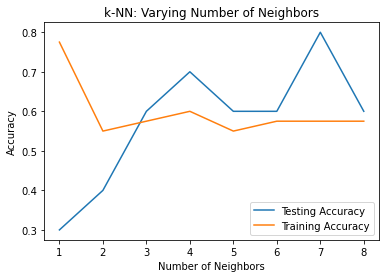

In [182]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [183]:
n=np.where(test_accuracy == max(test_accuracy))
knn = KNeighborsClassifier(n_neighbors=n[0][0]+1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [184]:
depth = np.arange(1, 9)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))
for i, k in enumerate(depth):
    ran = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=1)
    ran.fit(X_train, y_train)
    train_accuracy[i] = ran.score(X_train, y_train)
    test_accuracy[i] = ran.score(X_test, y_test)

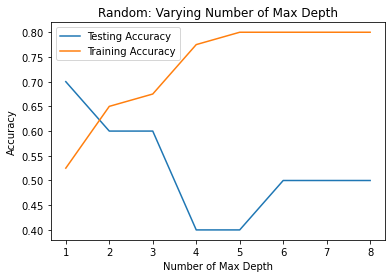

In [185]:
plt.title('Random: Varying Number of Max Depth')
plt.plot(depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [186]:
n=np.where(test_accuracy == max(test_accuracy))
ran = RandomForestClassifier(n_estimators=100, max_depth=n[0][0]+1, random_state=1)
ran.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [187]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [188]:
print("K Neighbors ",knn.score(X_test, y_test))
print("Random Forest Score: ",ran.score(X_test, y_test))
print("GaussianNB Score: ",gnb.score(X_test, y_test))

K Neighbors  0.8
Random Forest Score:  0.7
GaussianNB Score:  0.5


In [189]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
print("SGD Score: ",clf.score(X_test, y_test))

SGD Score:  0.5


/home/rafs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [190]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

bagging.fit(X_train, y_train)
print("Bagging Score: ",bagging.score(X_test, y_test))

Bagging Score:  0.6


In [191]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
print("NN Score: ",clf.score(X_test, y_test))

NN Score:  0.3


/home/rafs/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [198]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train).score(X_test, y_test)\

0.6

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()


clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean() > 0.999

False

In [200]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.375

In [201]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.4

In [202]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.35